In [121]:
import pandas as pd
df = pd.read_csv('/Users/taewon/Documents/금융 빅데이터/project_1/scaling_data.csv', encoding='utf-8')

pd.reset_option('display.max.rows',None)

In [122]:
df.drop(columns=['벤처확인 유형_1','벤처확인 유형_2', '벤처확인 유형_3', '벤처확인 유형_4'], inplace=True)

In [134]:
import skimage

import matplotlib

# matplotlib 설정
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

Learning rate set to 0.061956
0:	learn: 0.4653424	total: 40.3ms	remaining: 40.2s
1:	learn: 0.4592397	total: 47.3ms	remaining: 23.6s
2:	learn: 0.4537614	total: 51.4ms	remaining: 17.1s
3:	learn: 0.4488953	total: 54ms	remaining: 13.5s
4:	learn: 0.4446142	total: 57.8ms	remaining: 11.5s
5:	learn: 0.4404661	total: 62.3ms	remaining: 10.3s
6:	learn: 0.4367694	total: 64.7ms	remaining: 9.18s
7:	learn: 0.4336099	total: 67.1ms	remaining: 8.32s
8:	learn: 0.4306384	total: 69.5ms	remaining: 7.65s
9:	learn: 0.4279991	total: 71.8ms	remaining: 7.11s
10:	learn: 0.4255893	total: 74.1ms	remaining: 6.67s
11:	learn: 0.4233481	total: 76.4ms	remaining: 6.29s
12:	learn: 0.4210455	total: 78.7ms	remaining: 5.98s
13:	learn: 0.4192440	total: 81ms	remaining: 5.71s
14:	learn: 0.4174651	total: 85ms	remaining: 5.58s
15:	learn: 0.4155184	total: 89.3ms	remaining: 5.49s
16:	learn: 0.4138453	total: 91.7ms	remaining: 5.3s
17:	learn: 0.4123761	total: 94.1ms	remaining: 5.13s
18:	learn: 0.4109431	total: 99.5ms	remaining: 5.14s

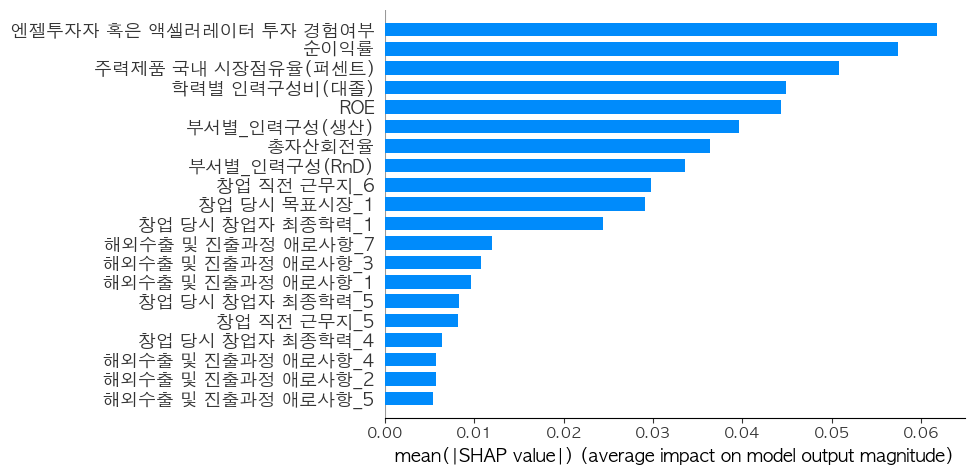

In [136]:
import catboost as cb
import shap
import pandas as pd
from sklearn.model_selection import train_test_split


# 특징 변수와 타겟 변수 분리
X = df.iloc[:, :-1]
y = df['벤처캐피털(투자조합포함) 투자 경험여부']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost 모델 학습
model = cb.CatBoostRegressor()
model.fit(X_train, y_train)

# SHAP Explainer 생성
explainer = shap.Explainer(model)

# SHAP 값을 계산
shap_values = explainer.shap_values(X_test)

# 특정 샘플의 SHAP 요약 확인
sample_index = 0
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar", plot_size=(10, 5))

# 특정 샘플의 SHAP 값 확인
shap.force_plot(explainer.expected_value, shap_values[sample_index], X_test.iloc[sample_index, :], feature_names=X.columns)


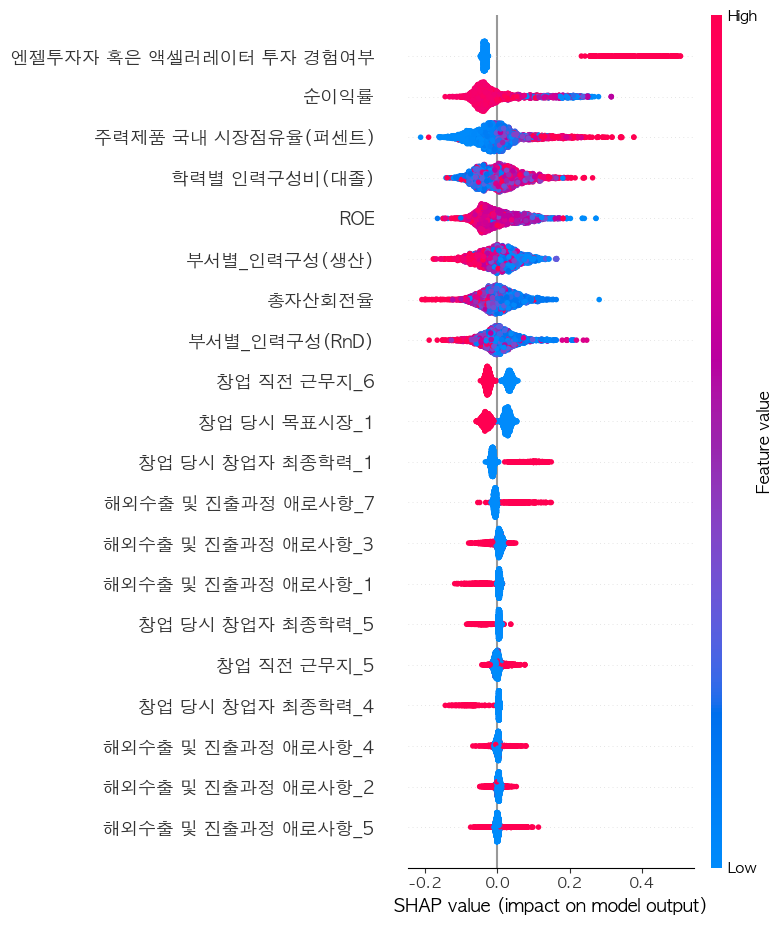

In [137]:
# summary
shap.summary_plot(shap_values, X_test)

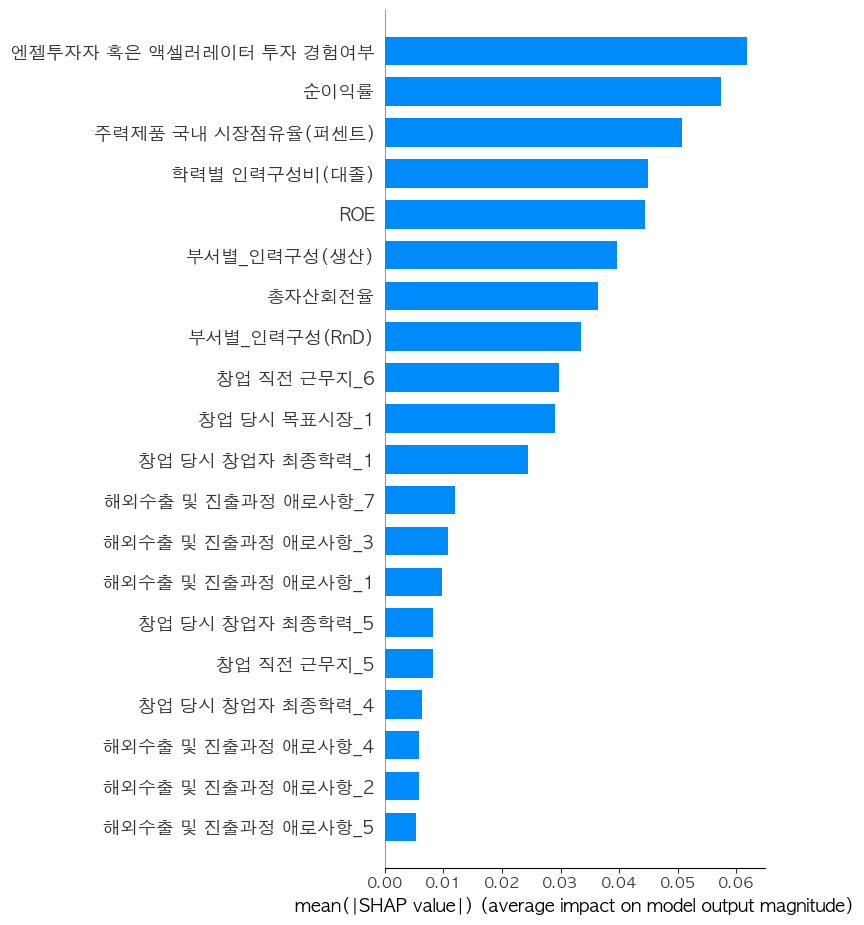

In [139]:
shap.summary_plot(shap_values, X_train, plot_type='bar')